<a href="https://colab.research.google.com/github/Aaryant31/Book-Recommendation-System/blob/main/Rahul_Kumar_Soni_Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [155]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
data_dir='/content/drive/MyDrive/Almabetter/Book Recommender System/DAT/'

In [157]:
books_df=pd.read_csv(data_dir + 'Books.csv')
users_df=pd.read_csv(data_dir + 'Users.csv')
ratings_df=pd.read_csv(data_dir + 'Ratings.csv')


In [158]:
print("books Data:    ", books_df.shape)
print("Users Data:    ", users_df.shape)
print("ratings Data: ", ratings_df.shape)

books Data:     (271360, 8)
Users Data:     (278858, 3)
ratings Data:  (1149780, 3)


# Data cleaning and pre-processing

## books_df Data cleaning and pre-processing

In [159]:
print("Columns: ", list(books_df.columns))
books_df.head()

Columns:  ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [160]:
## Drop URL columns
books_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [161]:
## Checking for null values
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [162]:
books_df[books_df['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [163]:
books_df[books_df['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [164]:
books_df['Book-Author'].fillna('other',inplace=True)

In [165]:
books_df['Publisher'].fillna('other',inplace=True)

In [166]:
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [167]:
## Checking for column Year-of-publication
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [168]:
books_df[books_df['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [169]:
books_df[books_df['Year-Of-Publication'] == 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [170]:
books_df.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books_df.at[209538 ,'Year-Of-Publication'] = 2000
books_df.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books_df.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books_df.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books_df.at[221678 ,'Year-Of-Publication'] = 2000
books_df.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Boofksf Come to Life (Level 4: Proficient Readers)'
books_df.at[209538 ,'Book-Author'] = 'James Buckley'

books_df.at[220731 ,'Publisher'] = 'Gallimard'
books_df.at[220731 ,'Year-Of-Publication'] = '2003'
books_df.at[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books_df.at[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [171]:
## Converting year of publication in Numbers
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(int)

In [172]:
print(sorted(list(books_df['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [173]:
# First we are filling the nan value where the years are greater than 2021 and 0 then replacing the nan with mean value.
books_df.loc[(books_df['Year-Of-Publication'] > 2021) | (books_df['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

#replacing NaNs with mean value of Year-Of-Publication
books_df['Year-Of-Publication'].fillna(round(books_df['Year-Of-Publication'].mean()), inplace=True)

In [174]:
## Drop duplicate rows
books_df.drop_duplicates(keep='last', inplace=True) 
books_df.reset_index(drop = True, inplace = True)

In [175]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271360 non-null  object 
 1   Book-Title           271360 non-null  object 
 2   Book-Author          271360 non-null  object 
 3   Year-Of-Publication  271360 non-null  float64
 4   Publisher            271360 non-null  object 
dtypes: float64(1), object(4)
memory usage: 10.4+ MB


In [176]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company


## Users_df Data cleaning and Preprocessing

In [177]:
print("Columns: ", list(users_df.columns))
users_df.head()

Columns:  ['User-ID', 'Location', 'Age']


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [178]:
## Checking null values
print(users_df.isna().sum())

User-ID          0
Location         0
Age         110762
dtype: int64


In [179]:
## Check for all values present in Age column
users_df['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

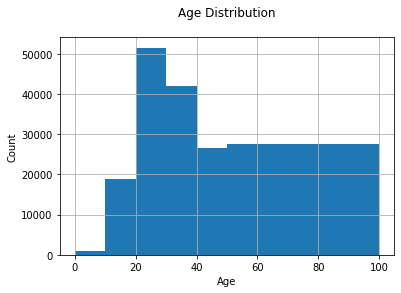

In [180]:
users_df.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [30]:
## Drop duplicate rows
users_df.drop_duplicates(keep='last', inplace=True)
users_df.reset_index(drop=True, inplace=True)

In [31]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   278858 non-null  int64 
 1   Location  278858 non-null  object
 2   Age       278858 non-null  int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 5.3+ MB


In [32]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


## ratings_df Data cleaning and Preprocessing

In [33]:
print("Columns: ", list(ratings_df.columns))
ratings_df.head()

Columns:  ['User-ID', 'ISBN', 'Book-Rating']


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [34]:
## Checking for null values
ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [35]:
## Drop duplicate rows
ratings_df.drop_duplicates(keep='last', inplace=True)
ratings_df.reset_index(drop=True, inplace=True)

In [36]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [37]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [38]:
dataset = pd.merge(books_df, ratings_df, on='ISBN', how='inner')
dataset = pd.merge(dataset, users_df, on='User-ID', how='inner')

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031136 non-null  object 
 3   Year-Of-Publication  1031136 non-null  float64
 4   Publisher            1031136 non-null  object 
 5   User-ID              1031136 non-null  int64  
 6   Book-Rating          1031136 non-null  int64  
 7   Location             1031136 non-null  object 
 8   Age                  1031136 non-null  int32  
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 74.7+ MB


# Data Visualization

Text(0.5, 1.0, 'No of books by an author (Top 15)')

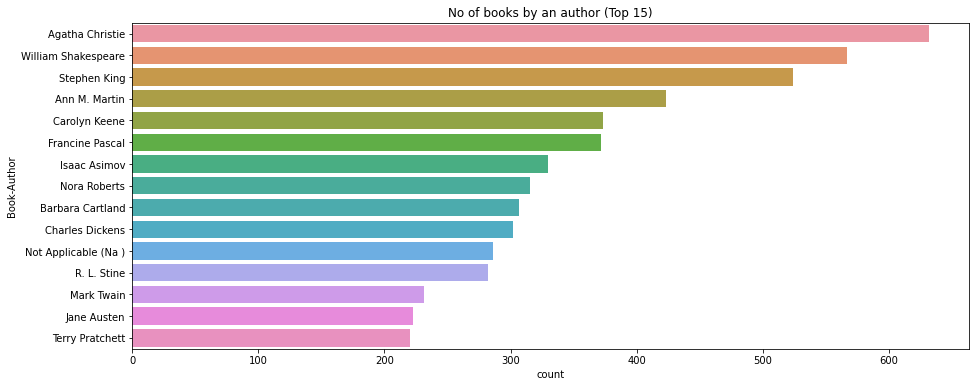

In [40]:
plt.figure(figsize=(15,6))
sns.countplot(y="Book-Author", data=books_df,order=books_df['Book-Author'].value_counts().index[0:15])
plt.title("No of books by an author (Top 15)")

Text(0.5, 1.0, 'No of books published by a publisher (Top 15)')

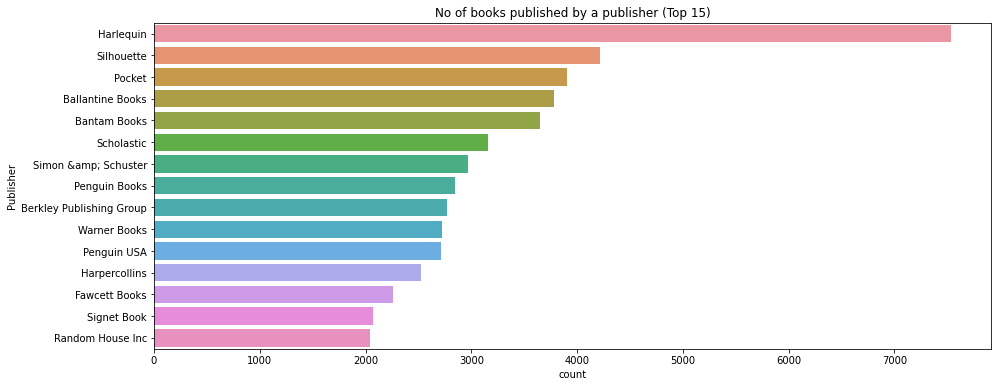

In [41]:
plt.figure(figsize=(15,6))
sns.countplot(y="Publisher", data=books_df,order=books_df['Publisher'].value_counts().index[0:15])
plt.title("No of books published by a publisher (Top 15)")

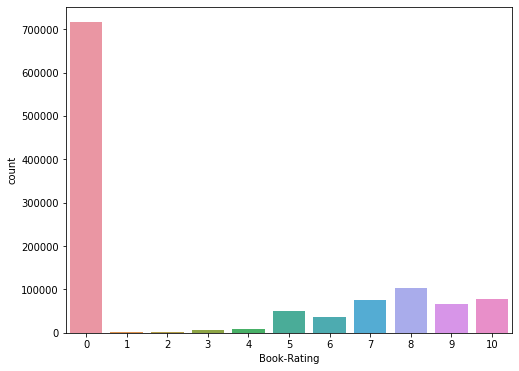

In [42]:
plt.figure(figsize=(8,6))
sns.countplot(x="Book-Rating", data=ratings_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

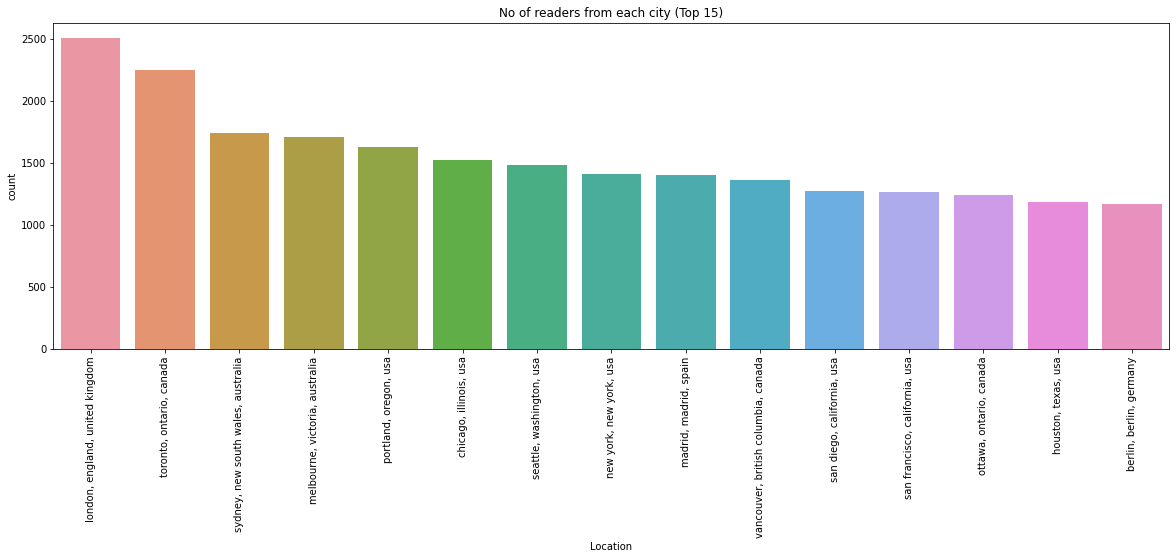

In [43]:
plt.figure(figsize=(20,6))
sns.countplot(x="Location", data=users_df,order=users_df['Location'].value_counts().index[0:15])
plt.title("No of readers from each city (Top 15)")
plt.xticks(rotation=90)

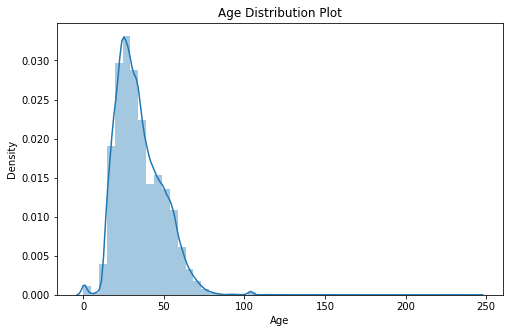

In [181]:
plt.figure(figsize=(8, 5))
sns.distplot(users_df.Age)
plt.title('Age Distribution Plot')
plt.show()

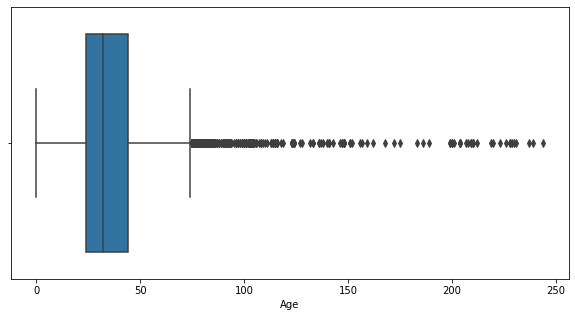

In [182]:
# Checking the Outliers in Age.
plt.figure(figsize = (10,5))
sns.boxplot(users_df.Age)
plt.xlabel('Age')
plt.show()

**handling outlier**

In [183]:
# First we are filling the nan value where the age is greater than 90 and less than 8 then replacing the nan with mean value.
users_df.loc[(users_df['Age'] > 90) | (users_df['Age'] < 8), 'Age']= np.NAN
users_df['Age']= users_df['Age'].fillna(users_df['Age'].mean())
users_df['Age']= users_df['Age'].astype(np.int32)

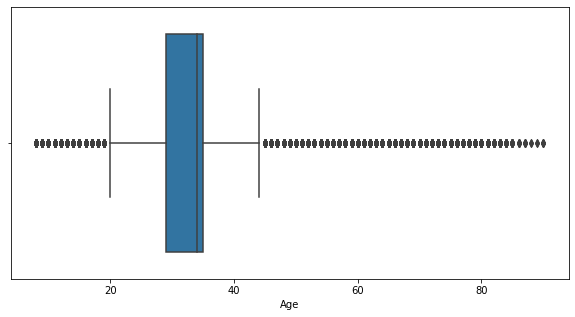

In [184]:
plt.figure(figsize = (10,5))
sns.boxplot(users_df.Age)
plt.xlabel('Age')
plt.show()

In [185]:
books_df['Year-Of-Publication'].describe()

count    271360.000000
mean       1993.693241
std           8.249980
min        1376.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2021.000000
Name: Year-Of-Publication, dtype: float64

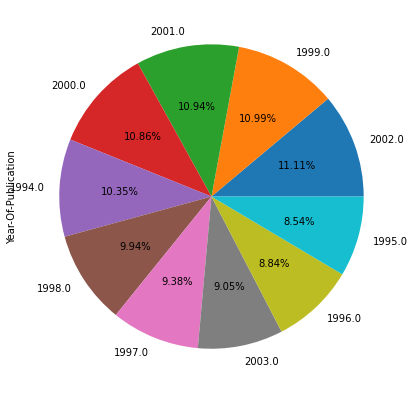

In [186]:
fig= plt.figure(figsize=(15,7))
books_df['Year-Of-Publication'].value_counts().head(10).plot(kind='pie', autopct='%1.2f%%')
plt.show()

**observation**

most of the book published on 2002

### Recommendations based on correlations
**We use Pearsons’R correlation coefficient to measure the linear correlation between two variables, in our case, the ratings for two books**.

**First, we need to find out the average rating, and the number of ratings each book received** .



In [44]:
average_rating = pd.DataFrame(ratings_df.groupby('ISBN')['Book-Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings_df.groupby('ISBN')['Book-Rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,Book-Rating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


**To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded**

In [45]:
user_counts = ratings_df['User-ID'].value_counts()
ratings_df = ratings_df[ratings_df['User-ID'].isin(user_counts[user_counts >= 200].index)]
rating_count = ratings_df['Book-Rating'].value_counts()
ratings = ratings_df[ratings_df['Book-Rating'].isin(rating_count[rating_count >= 100].index)]

### Rating matrix

We convert the ratings table to a 2D matrix. The matrix will be sparse because not every user rated every book.

In [46]:
ratings_pivot = ratings_df.pivot(index='User-ID', columns='ISBN',values='Book-Rating')
UserID = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(905, 207699)


ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,9061002273,*0515128325,+0451197399,0 00 612183 7,0 00 614494 2,0 7336 1053 6,0 907 062 008,0*708880258,0.330241664,00000000,000000000,0000000000,00000000000,000000000000,0000000000000,0000000029841,0000000030670,0000000033220,0000000051,0000001042283,0000001481,0000018030,0000722105029,0000913154,0001010565,0001046438,000104687X,0001047213,0001047639,0001047663,...,O425155404,O42516313X,O439060737,O439161673,O446611638,O451203771,O499139921,O590418262,O590477412,O59052528X,O67174142X,O774037474,O77O428452,O786001690,O805063196,O856856428,O861366301,O880015152,O889950962,O9088446X,PS3569E84K5,Q380708353,Q912838027,SBN67001026X,T110105305048,T110105705048,TBR0385495641,THEALLTRUETRA,THECATASTROPH,THEFLYINGACE,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
bones_ratings = ratings_pivot['0316666343']
similar_to_bones = ratings_pivot.corrwith(bones_ratings)
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(average_rating['ratingCount'])
corr_summary[corr_summary['ratingCount']>=300].sort_values('pearsonR', ascending=False).head(10)

,pearsonR,ratingCount
ISBN,,
0316666343,1.000000,1295
0312291639,0.471872,354
0316601950,0.434248,568
0446610038,0.429712,391
0446672211,0.421478,585
0385265700,0.351635,319
0345342968,0.316922,321
0060930535,0.309860,494
0375707972,0.308145,354


We obtained the books’ ISBNs, but we need to find out the titles of the books to see whether they make sense.

In [48]:
books_corr_to_bones = pd.DataFrame(['0312291639', '0316601950', '0446610038', '0446672211', '0385265700', '0345342968', '0060930535', '0375707972', '0684872153'], 
                                  index=np.arange(9), columns=['ISBN'])
corr_books = pd.merge(books_corr_to_bones, books_df, on='ISBN')
corr_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0312291639,The Nanny Diaries: A Novel,Emma McLaughlin,2003.0,St. Martin's Griffin
1,0316601950,The Pilot's Wife : A Novel,Anita Shreve,1999.0,Back Bay Books
2,0446610038,1st to Die: A Novel,James Patterson,2002.0,Warner Vision
3,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998.0,Warner Books
4,0385265700,The Book of Ruth (Oprah's Book Club (Paperback)),Jane Hamilton,1990.0,Anchor
5,0345342968,Fahrenheit 451,RAY BRADBURY,1987.0,Del Rey
6,0060930535,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999.0,Perennial
7,0375707972,The Reader,Bernhard Schlink,1999.0,Vintage Books USA
8,0684872153,Angela's Ashes (MMP) : A Memoir,Frank McCourt,1999.0,Scribner


# Collaborative Filtering Using k-Nearest Neighbors (kNN)

In [49]:
combine_book_rating = pd.merge(ratings_df, books_df, on='ISBN')

combine_book_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc


We then group by book titles and create a new column for total rating count.

In [50]:

combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['Book-Title'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['Book-Title'])['Book-Rating'].
     count().
     reset_index().
     rename(columns = {'Book-Rating': 'totalRatingCount'})
     [['Book-Title', 'totalRatingCount']]
    )
book_ratingCount.head()

,Book-Title,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


We combine the rating data with the total rating count data, this gives us exactly what we need to find out which books are popular and filter out lesser-known books.

In [51]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
rating_with_totalRatingCount.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82


In [52]:
book_ratingCount['totalRatingCount'].describe()

count    160576.000000
mean          3.043680
std           7.428434
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         365.000000
Name: totalRatingCount, dtype: float64

In [109]:
rating_popular_book = rating_with_totalRatingCount[rating_with_totalRatingCount['totalRatingCount'] >= 50]
rating_popular_book.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82


In [110]:
rating_popular_book.shape

(62149, 8)

# **Filter to users in US**

In order to improve computing speed, and not run into the 'MemoryError' issue we will limit our users data to those in the US. Then combine the user data with rating data and total rating count data.

In [111]:
combined = rating_popular_book.merge(users_df, left_on = 'User-ID', right_on = 'User-ID', how = 'left')

us_user_rating = combined[combined['Location'].str.contains("usa")]
us_user_rating=us_user_rating.drop('Age', axis=1)
us_user_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,totalRatingCount,Location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82,"gilbert, arizona, usa"
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82,"knoxville, tennessee, usa"
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82,"byron, minnesota, usa"
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82,"cordova, tennessee, usa"
5,16795,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82,"mechanicsville, maryland, usa"
...,...,...,...,...,...,...,...,...,...
62144,269566,0670809381,0,Echoes,Maeve Binchy,1986.0,Penguin USA,54,"seattle, washington, usa"
62145,271284,0440910927,0,The Rainmaker,John Grisham,1995.0,Island,180,"alexandria, virginia, usa"
62146,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993.0,Simon &amp; Schuster,119,"atlanta, georgia, usa"
62147,274808,0449701913,0,Homecoming,Cynthia Voigt,1983.0,Fawcett Books,61,"paynesville, , usa"


Remove the duplicates present in rating popular book data.

In [112]:
if not rating_popular_book[rating_popular_book.duplicated(['User-ID', 'Book-Title'])].empty:

    # Identifying number of rows corresponding to the US.
    print('Actual rating_popular_book shape {0}'.format(rating_popular_book.shape))

    rating_popular_book = rating_popular_book.drop_duplicates(['User-ID', 'Book-Title'])

    # Identifying number of rows corresponding to the US duplicates.
    print('Rating_popular_book shape after removing the duplicates  {0}'.format(rating_popular_book.shape))

Actual rating_popular_book shape (62149, 8)
Rating_popular_book shape after removing the duplicates  (60141, 8)


# **Implementing kNN**

We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

Finding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “auto”, and we specify “metric=minkowski”. Finally, we fit the model.

At first create a pivote table.

In [113]:
from scipy.sparse import csr_matrix
us_user_rating_pivot = rating_popular_book.pivot(index = 'Book-Title',columns = 'User-ID', values = 'Book-Rating').fillna(0)
us_user_rating_matrix = csr_matrix(us_user_rating_pivot.values)

**Finding the Nearest Neighbors**

In [114]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

**Test our model and make few recommendation**

In [115]:
query_index = np.random.choice(us_user_rating_pivot.shape[0])
print(query_index)


444


In [116]:
distances, indices = model_knn.kneighbors(us_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [117]:
us_user_rating_pivot.index[query_index]

'September'

In [118]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for September:

1: Winter Solstice, with distance of 0.38226536830714997:
2: Coming Home, with distance of 0.46679965084648345:
3: Tara Road, with distance of 0.6123808975630446:
4: Evening Class, with distance of 0.6176567016660519:
5: Echoes, with distance of 0.6303984348336507:


**We are only considering those ratings that are not eqaul to 0.**

In [119]:
us_user_rating.shape

(51393, 9)

In [120]:
# Ratings that are not 0.
us_user_rating= us_user_rating[us_user_rating['Book-Rating'] != 0]

In [121]:
us_user_rating.shape

(12110, 9)

In [122]:
us_user_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,totalRatingCount,Location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82,"gilbert, arizona, usa"
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82,"byron, minnesota, usa"
12,41084,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82,"orlando, florida, usa"
16,52584,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82,"livermore, california, usa"
19,71712,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82,"valley center, kansas, usa"


# **Filtering users with atleast 10 interaction**

In [123]:
users_interactions_count_df = us_user_rating.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('Number of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 10].reset_index()[['User-ID']]
print('Number of users with at least 10 interactions: %d' % len(users_with_enough_interactions_df))

Number of users: 622
Number of users with at least 10 interactions: 413


In [124]:
print('Number of interactions: %d' % len(us_user_rating))
interactions_from_selected_users_df = us_user_rating.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('Number of interactions from users with at least 10 interactions: %d' % len(interactions_from_selected_users_df))

Number of interactions: 12110
Number of interactions from users with at least 10 interactions: 11049


In [125]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,totalRatingCount,Location
0,254,0142001740,9,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books,209,"minneapolis, minnesota, usa"
1,254,0439064872,9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000.0,Scholastic,184,"minneapolis, minnesota, usa"
2,254,0439136369,9,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001.0,Scholastic,138,"minneapolis, minnesota, usa"
3,254,0380789035,10,American Gods,Neil Gaiman,2002.0,HarperTorch,95,"minneapolis, minnesota, usa"
4,254,037582345X,9,"The Golden Compass (His Dark Materials, Book 1)",PHILIP PULLMAN,2002.0,Knopf Books for Young Readers,131,"minneapolis, minnesota, usa"
5,254,0375823468,9,"The Subtle Knife (His Dark Materials, Book 2)",PHILIP PULLMAN,2002.0,Knopf Books for Young Readers,83,"minneapolis, minnesota, usa"
6,254,0380973634,10,Neverwhere,Neil Gaiman,1997.0,William Morrow,72,"minneapolis, minnesota, usa"
7,254,0399146431,9,The Bonesetter's Daughter,Amy Tan,2001.0,Putnam Publishing Group,135,"minneapolis, minnesota, usa"
8,254,0439064864,9,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999.0,Scholastic,184,"minneapolis, minnesota, usa"
9,254,0439136350,9,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999.0,Scholastic,138,"minneapolis, minnesota, usa"


## **We are applying log transformation to smooth the distribution!!**

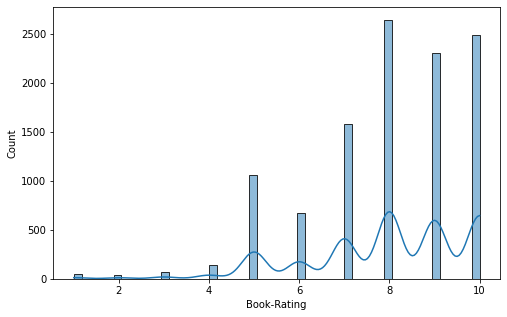

In [126]:
# Before log transformation
plt.figure(figsize=(8, 5))
sns.histplot(interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum(), kde=True)
plt.show()

In [127]:
import math
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('Number of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

Number of unique user/item interactions: 11049


,ISBN,User-ID,Book-Rating
0,002542730X,12538,3.459432
1,002542730X,41084,3.000000
2,002542730X,52584,3.459432
3,002542730X,110934,2.807355
4,002542730X,113270,2.584963


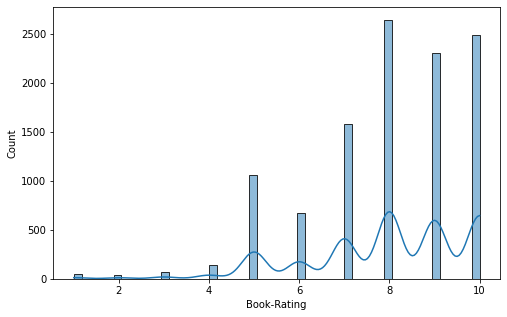

In [128]:
# After log transformation
plt.figure(figsize=(8, 5))
sns.histplot(interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum(), kde=True)
plt.show()

# **Splitting data into Train And Test Dataset**

In [129]:
from sklearn.model_selection import train_test_split

interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

print('Number interactions on Train set: %d' % len(interactions_train_df))
print('Number interactions on Test set: %d' % len(interactions_test_df))

Number interactions on Train set: 8839
Number interactions on Test set: 2210


In [130]:
interactions_test_df.head()

,ISBN,User-ID,Book-Rating
2231,0345378482,224138,3.459432
3857,0385505833,76151,3.459432
6344,0446604801,104636,2.807355
1592,0316601950,30276,2.807355
1778,0316693324,76151,3.459432


In [131]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,002542730X,0060008032,006001203X,0060086246,0060090367,0060092572,0060096195,0060129565,0060158638,0060168013,006016848X,0060175400,0060198133,0060199652,0060283130,0060391626,0060392452,0060502258,0060512822,0060541814,0060541830,0060809833,0060830956,0060915544,0060921145,0060922532,0060928336,0060929871,0060930535,0060934417,0060935464,0060938455,0060958022,0060958324,0060959037,0060976845,0060977477,0060977493,0060987103,0060987529,...,1565115430,1565116674,1565116690,1565117794,1565122054,1566190932,1567404731,1568654243,1569471169,1569873925,1570421161,1570423830,1570426201,1570427119,1570427135,1570427143,1570427690,1570428581,1570429715,1571740325,1573220221,1573220876,1573221937,1573222038,1573225517,1573225789,1573227331,1573228214,1573229326,1573229725,1586210661,1586212869,1586214055,1587882337,1587887789,1594140979,1855940027,1878448900,1931056323,B0000T6KHI
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.169925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.169925,0.0,0.0,0.0,3.321928,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.459432,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [133]:
# Check the list of user id of the users
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[254, 2276, 2766, 4017, 6251, 6323, 6543, 6563, 6575, 7158]

# SVD- Model Based Collaborative Filtering

The Singular-Value Decomposition, or SVD for short, is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler. It provides another way to factorize a matrix, into singular vectors and singular values.

## **A=U.Sigma.VT**

In [134]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [135]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [136]:
users_items_pivot_matrix.shape

(413, 1487)

In [137]:
U.shape

(413, 15)

In [138]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [139]:
Vt.shape

(15, 1487)

**After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.**

In [140]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 0.07376176,  0.00223027,  0.03695808, ...,  0.01689943,
        -0.00181411, -0.01584876],
       [ 0.01163665,  0.02845748,  0.02553018, ..., -0.01060237,
         0.00107598, -0.00060448],
       [ 0.08431249,  0.00401639, -0.01649444, ...,  0.05837666,
        -0.00176365,  0.08441381],
       ...,
       [ 0.0357052 ,  0.0067572 ,  0.01516564, ..., -0.0368187 ,
         0.00396665, -0.0130949 ],
       [ 0.03515637,  0.04590026, -0.00832205, ...,  0.07521986,
         0.00242121, -0.00491695],
       [ 0.09170586,  0.01420456,  0.00065443, ..., -0.00731619,
         0.00052551, -0.003973  ]])

In [141]:
all_user_predicted_ratings.shape

(413, 1487)

**Making DataFrame from our predicted ratings.**

In [142]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,254,2276,2766,4017,6251,6323,6543,6563,6575,7158,7346,7915,8067,8245,8681,10447,12538,12824,13273,13552,13850,14422,14521,16106,16634,16795,19085,19664,21014,21576,21659,22625,23768,23872,24921,25409,25981,26544,26593,28634,...,250184,251394,251422,251843,252071,252695,254206,254465,255489,256407,258185,258534,258938,259260,259629,260897,261829,263163,264031,264082,265115,265313,266056,266226,266865,267635,268032,268110,268622,269566,269890,270820,271195,271448,271705,273979,274061,274308,275970,277427
ISBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
002542730X,0.073762,0.011637,0.084312,0.127990,0.111998,0.021964,0.045192,-0.022974,0.223382,0.042273,0.214663,0.086620,-0.056962,0.047324,0.043211,0.022299,0.041361,0.044126,0.101670,-0.134996,0.028693,0.025170,0.069731,0.044655,0.130447,0.249085,0.002691,0.024686,0.152232,0.074679,0.044567,0.188368,0.017385,0.185485,0.018104,-0.009176,-0.099012,0.029690,0.014571,0.061543,...,0.019692,0.037464,0.036991,0.190796,0.032316,-0.033073,0.075258,0.033571,0.173635,0.061688,-0.050927,0.313456,0.041250,0.034453,0.026324,0.064074,0.087915,0.076957,0.061054,0.008946,0.029325,0.032754,0.064119,0.026430,0.042793,0.002178,0.073666,0.031150,0.028687,0.112269,-0.009424,-0.051716,0.065118,0.142699,0.057190,0.042047,0.106002,0.035705,0.035156,0.091706
0060008032,0.002230,0.028457,0.004016,-0.018127,0.117717,-0.008480,0.074959,-0.021350,0.320725,-0.002989,0.224725,0.096607,0.079735,0.005539,0.033757,0.062544,0.024265,0.008730,0.013383,0.052766,0.017328,0.043110,0.018294,0.038987,0.002118,0.022289,-0.011834,0.013392,0.121768,0.015985,-0.000194,0.016017,-0.008486,-0.009278,0.000764,0.014260,0.063329,-0.003582,0.004303,0.025724,...,0.012350,0.013345,0.009438,-0.040201,-0.028142,0.017662,0.010906,0.009769,0.022527,-0.007600,-0.000925,0.114631,0.015738,0.012905,0.002493,0.006362,0.012080,0.049662,-0.018982,0.003689,0.132141,0.002553,0.055320,0.030295,0.040488,-0.003333,-0.005720,0.039138,0.033149,0.013221,0.016764,-0.024637,0.013241,0.091300,0.082881,0.011281,0.015256,0.006757,0.045900,0.014205
006001203X,0.036958,0.025530,-0.016494,0.161326,-0.000799,-0.022614,0.037523,0.024306,-0.052427,0.211654,-0.210669,0.111353,-0.048550,0.035479,0.038339,0.044544,0.053527,0.006985,0.041031,0.469662,-0.003814,0.056649,0.061075,-0.057420,-0.096222,2.685960,-0.002562,0.031035,0.226497,-0.037542,0.117400,0.195666,0.059662,0.170278,0.084756,-0.002623,0.032436,0.066549,-0.047232,0.153214,...,0.120953,0.004243,0.149051,-0.068480,0.052275,0.017958,-0.105103,0.319724,0.095682,0.034934,0.047722,-0.333477,0.102840,0.045571,0.021741,0.043978,0.085969,-0.030707,0.285700,0.097147,-0.050072,0.014359,0.071791,-0.009447,0.038360,-0.004444,-0.001249,-0.052376,0.007436,0.027132,-0.016485,0.132792,0.041299,0.124433,-0.023790,0.009672,-0.105619,0.015166,-0.008322,0.000654
0060086246,-0.016153,0.006092,-0.002861,-0.000225,-0.005020,0.003216,0.006115,0.015301,0.027582,-0.004013,0.025805,0.002530,0.004258,0.012956,0.000659,0.009816,0.002579,-0.000038,-0.000329,0.108804,0.005154,0.012867,0.002706,0.005880,-0.000274,-0.079079,0.006289,-0.000957,0.002874,0.004959,0.014376,0.011449,-0.003764,-0.009570,0.003329,-0.005125,-0.006143,0.010062,-0.001950,0.006186,...,-0.007492,-0.001391,0.001058,0.010002,-0.002587,0.014938,-0.010874,0.008493,0.032704,0.001830,0.015326,-0.031866,0.003430,0.000299,0.011950,-0.000517,0.010256,-0.000378,-0.003844,0.024992,0.022129,0.004006,0.009423,0.000388,0.005265,-0.001324,0.006326,0.002661,0.014303,0.001844,0.002090,0.014370,0.008653,-0.000671,-0.000267,0.000260,-0.006043,0.016585,0.007129,-0.001155
0060090367,-0.023434,0.018726,0.028737,0.068280,0.071360,-0.001675,0.073339,0.000484,0.268018,0.035388,0.136442,0.046661,0.005909,-0.012800,0.032857,0.083366,0.026579,0.002250,-0.003074,0.003237,0.041659,0.052068,-0.029325,0.030213,0.020713,0.280651,-0.029416,0.024524,0.100158,0.032147,-0.008854,0.113642,0.030345,0.004307,0.009082,0.015993,0.011264,0.015970,0.001223,0.038284,...,0.0

In [143]:
len(cf_preds_df.columns)

413

In [144]:
global books_df
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company


### **Colaborative Filtering Recommender Class**

In [145]:
import random

In [146]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books_df,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

# **Evaluation**

### In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with **Top-N accuracy metrics**, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.

### This evaluation method works as follows:

* ### For each user
    * ### For each item the user has interacted in test set
        * ### Sample 100 other items the user has never interacted.   
        * ### Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
        * ### Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
* ### Aggregate the global Top-N accuracy metrics

In [147]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

The Top-N accuracy metric choosen was **Recall@N** which evaluates whether the interacted item is among the top N items (hit) in the ranked list of 101 recommendations for a user.

In [148]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [149]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(us_user_rating['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([str(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()

In [150]:
print(list(interactions_full_indexed_df.index.values))

[12538, 41084, 52584, 110934, 113270, 128835, 150979, 174216, 183995, 208671, 225763, 229741, 269566, 277427, 135149, 165308, 205980, 265115, 271705, 13552, 16795, 31315, 235282, 242106, 229011, 265115, 105979, 117251, 125519, 160819, 196077, 209756, 41084, 7346, 8067, 13552, 25409, 95359, 125692, 127359, 181687, 251422, 115490, 55892, 113270, 218608, 13850, 16634, 31556, 39281, 165308, 246513, 21014, 55187, 69078, 95359, 100459, 110912, 130571, 138578, 150979, 6575, 10447, 52853, 224349, 6563, 8245, 55187, 69078, 100459, 110912, 111174, 142524, 236757, 242299, 31556, 55492, 55892, 46398, 63938, 101876, 108005, 126604, 172742, 226965, 235282, 6251, 16634, 51883, 56856, 60244, 60337, 75591, 81977, 85757, 87555, 94347, 95359, 100459, 110912, 126604, 142524, 145641, 157273, 178199, 183995, 222296, 225763, 234828, 245410, 6575, 13850, 21576, 29259, 30735, 35859, 51450, 55492, 60244, 64436, 76818, 110934, 110973, 135045, 137589, 141710, 149069, 153662, 160819, 172742, 177090, 178667, 196077

In [151]:
user=int(input("Enter User ID from above list for book recommendation:  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation:  110934
Recommendation for User-ID =  110934
         ISBN                                         Book-Title  recStrength
0  059035342X  Harry Potter and the Sorcerer's Stone (Harry P...     1.978446
1  0671001795                                  Two for the Dough     1.778162
2  0590353403     Harry Potter and the Sorcerer's Stone (Book 1)     1.712296
3  0312983867  Hard Eight : A Stephanie Plum Novel (A Stephan...     1.699118
4  043935806X  Harry Potter and the Order of the Phoenix (Boo...     1.303833
5  0345370775                                      Jurassic Park     1.275817
6  0142001740                            The Secret Life of Bees     1.244652
7  0312195516                The Red Tent (Bestselling Backlist)     1.226270
8  0385484518  Tuesdays with Morrie: An Old Man, a Young Man,...     1.067487
9  0060392452  Stupid White Men ...and Other Sorry Excuses fo...     0.990754


In [152]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(us_user_rating['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([str(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        hits_at_15_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10
            hit_at_15, index_at_15 = self._verify_hit_top_n(item_id, valid_recs, 15)
            hits_at_15_count += hit_at_15

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)
        recall_at_15 = hits_at_15_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'hits@15_count':hits_at_15_count,
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10,
                          'recall@15': recall_at_15}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_15 = detailed_results_df['hits@15_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10,
                          'recall@15': global_recall_at_15}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()

In [153]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
412 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.25972850678733034, 'recall@10': 0.36425339366515835, 'recall@15': 0.4475113122171946}


,hits@5_count,hits@10_count,hits@15_count,interacted_count,recall@5,recall@10,recall@15,User-ID
26,5,10,12,32,0.156250,0.312500,0.375000,16795
96,5,7,9,27,0.185185,0.259259,0.333333,95359
11,8,10,11,25,0.320000,0.400000,0.440000,153662
2,9,9,11,24,0.375000,0.375000,0.458333,104636
126,7,9,12,22,0.318182,0.409091,0.545455,158295
48,7,9,11,21,0.333333,0.428571,0.523810,114368
58,4,7,9,18,0.222222,0.388889,0.500000,60244
40,7,9,11,17,0.411765,0.529412,0.647059,258534
32,5,6,8,17,0.294118,0.352941,0.470588,35859
80,4,6,7,17,0.235294,0.352941,0.411765,140358


# Conclusion

As we can see, after implementing Collaborative Filtering and evaluating it using SVD matrix we are satisfied with the results. A recall rate of around 50 for hit@15 is fair enough for such a large dataset. Also since it is an unsupervised learning algorithm trying to find good books that users will likes which in itself is a very vast and complicated study.